# **Machine Learning - Lab-Project**

---

##### Lab-Project of **Group 5**.

**Members:**
- Ammar Darwich <br>
- Raghad Shakhashiro <br>
- Lukas Jeckle <br>
- Luke Weiss <br>
- Valentin Talmon-l´Armèe <br>

---

## **Prediction of successful Startups**


#### In this Lab-Project we want to take a look at the [Startup-Investments-Crunchbase](https://www.kaggle.com/datasets/arindam235/startup-investments-crunchbase) Dataset to train a machine learning model for predicting success probabilities for startups.

---

## **1. Imports and Random**

---

#### 1.1 Adding the neccessary imports:

In [1]:
# =======================================================================================================
# Project Imports:
# =======================================================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, OneHotEncoder


#### 1.2 Definition of random seed:

In [2]:
# =======================================================================================================
# Defining and setting the random seed:
# =======================================================================================================

RSEED = np.random.seed(42)


#### 1.3 Adjusting global import settings:

In [3]:
# =======================================================================================================
# Adjusting global settings:
# =======================================================================================================

pd.set_option('display.max_columns', None)


## **2. Data Visualization & Preperation**

---

#### 2.1 Importing the data into a dataframe:

In [4]:
# =======================================================================================================
# Importing the data and visualizing the first few samples:
# =======================================================================================================

df = pd.read_csv('data/investments_VC.csv', encoding='latin1')
df.head()


,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,New York,1.0,2012-06-01,2012-06,2012-Q2,2012.0,2012-06-30,2012-06-30,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,Los Angeles,2.0,NaN,NaN,NaN,NaN,2010-06-04,2010-09-23,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,Tallinn,1.0,2012-10-26,2012-10,2012-Q4,2012.0,2012-08-09,2012-08-09,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,London,1.0,2011-04-01,2011-04,2011-Q2,2011.0,2011-04-01,2011-04-01,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,Fort Worth,2.0,2014-01-01,2014-01,2014-Q1,2014.0,2014-08-17,2014-09-26,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 2.2 Cleaning the data:

In [5]:
# =======================================================================================================
# Dropping unnecessary columns:
# =======================================================================================================

df.drop(['permalink', 'category_list', 'homepage_url', 'country_code', 'state_code', 'city', 'founded_at', 'founded_month', 'founded_quarter', 'founded_year', 'first_funding_at', 'last_funding_at', 'round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'], axis=1, inplace=True)
df.head()


,name,market,funding_total_usd,status,region,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
0,#waywire,News,"17,50,000",acquired,New York City,1.0,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,&TV Communications,Games,"40,00,000",operating,Los Angeles,2.0,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,'Rock' Your Paper,Publishing,"40,000",operating,Tallinn,1.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,(In)Touch Network,Electronics,"15,00,000",operating,London,1.0,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-R- Ranch and Mine,Tourism,"60,000",operating,Dallas,2.0,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# =======================================================================================================
# Getting information of the data:
# =======================================================================================================

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  49437 non-null  object 
 1    market               45470 non-null  object 
 2    funding_total_usd    49438 non-null  object 
 3   status                48124 non-null  object 
 4   region                44165 non-null  object 
 5   funding_rounds        49438 non-null  float64
 6   seed                  49438 non-null  float64
 7   venture               49438 non-null  float64
 8   equity_crowdfunding   49438 non-null  float64
 9   undisclosed           49438 non-null  float64
 10  convertible_note      49438 non-null  float64
 11  debt_financing        49438 non-null  float64
 12  angel                 49438 non-null  float64
 13  grant                 49438 non-null  float64
 14  private_equity        49438 non-null  float64
 15  post_ipo_equity    

In [7]:
# =======================================================================================================
# Ordinal Encode columns of type 'object':
# =======================================================================================================

encoder = OrdinalEncoder()

columns_to_encode = df.select_dtypes(include=['object']).columns
for column in columns_to_encode:
    feature = pd.DataFrame(df[column])
    df[column] = encoder.fit_transform(feature)

df.head()


,name,market,funding_total_usd,status,region,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
0,0.0,465.0,3978.0,0.0,699.0,1.0,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,277.0,9441.0,2.0,570.0,2.0,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,543.0,9446.0,2.0,956.0,1.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,211.0,3482.0,2.0,568.0,1.0,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,683.0,11816.0,2.0,251.0,2.0,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# =======================================================================================================
# Cleaning null values:
# =======================================================================================================

print('Before cleaning:')
print(np.isnan(df).sum())
print()

df = df.fillna(0)

print('After cleaning:')
print(np.isnan(df).sum())
print()


Before cleaning:
name                     4857
 market                  8824
 funding_total_usd       4856
status                   6170
region                  10129
funding_rounds           4856
seed                     4856
venture                  4856
equity_crowdfunding      4856
undisclosed              4856
convertible_note         4856
debt_financing           4856
angel                    4856
grant                    4856
private_equity           4856
post_ipo_equity          4856
post_ipo_debt            4856
secondary_market         4856
product_crowdfunding     4856
dtype: int64

After cleaning:
name                    0
 market                 0
 funding_total_usd      0
status                  0
region                  0
funding_rounds          0
seed                    0
venture                 0
equity_crowdfunding     0
undisclosed             0
convertible_note        0
debt_financing          0
angel                   0
grant                   0
private_equity     

#### 2.3 Visualizing the data:

In [9]:
# =======================================================================================================
# Getting a description of the data:
# =======================================================================================================

df.describe()


,name,market,funding_total_usd,status,region,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
count,54294.000000,54294.000000,54294.000000,54294.000000,54294.000000,54294.000000,5.429400e+04,5.429400e+04,5.429400e+04,5.429400e+04,5.429400e+04,5.429400e+04,5.429400e+04,5.429400e+04,5.429400e+04,5.429400e+04,5.429400e+04,5.429400e+04,5.429400e+04
mean,22471.581261,290.910635,5181.210484,1.588776,481.223321,1.544498,1.978845e+05,6.830164e+06,5.612081e+03,1.185744e+05,2.127444e+04,1.719282e+06,5.956797e+04,1.482806e+05,1.888764e+06,5.544166e+05,4.037755e+05,3.501646e+04,6.441515e+03
std,15309.793339,238.218866,4682.415629,0.778082,357.079247,1.326458,1.010514e+06,2.725227e+07,1.907637e+05,2.845195e+06,1.366521e+06,1.318804e+08,6.284397e+05,5.355438e+06,3.022854e+07,2.555825e+07,3.271294e+07,3.687610e+06,4.086231e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8708.250000,59.000000,3.000000,2.000000,89.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,22255.500000,255.000000,4437.000000,2.000000,568.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,35807.750000,506.000000,9446.000000,2.000000,836.000000,2.000000,1.000000e+04,3.960000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,49349.000000,752.000000,14616.000000,2.000000,1088.000000,18.000000,1.300000e+08,2.351000e+09,2.500000e+07,2.924328e+08,3.000000e+08,3.007950e+10,6.359026e+07,7.505000e+08,3.500000e+09,4.700000e+09,5.800000e+09,6.806116e+08,7.200000e+07


In [10]:
# =======================================================================================================
# Getting the amounts of unique entries for each column (sorted):
# =======================================================================================================

print('Unsorted:')
for column in df.columns:
    if (len(df[column].unique()) > 2):
        print(f'Column "{column}" has - {len(df[column].unique())} - unique values.')

pairs = {}
count = 0

for column in df.columns:
    pairs[column] = len(df[column].unique())
    count = count + 1

print()
print('Sorted:')
for key_name in sorted(pairs, key=pairs.get, reverse=True):
    if (pairs[key_name] > 2):
        print(f'Column "{key_name}" has - {pairs[key_name]} - unique values.')


Unsorted:
Column "name" has - 49350 - unique values.
Column " market " has - 753 - unique values.
Column " funding_total_usd " has - 14617 - unique values.
Column "status" has - 3 - unique values.
Column "region" has - 1089 - unique values.
Column "funding_rounds" has - 18 - unique values.
Column "seed" has - 3337 - unique values.
Column "venture" has - 9300 - unique values.
Column "equity_crowdfunding" has - 252 - unique values.
Column "undisclosed" has - 687 - unique values.
Column "convertible_note" has - 299 - unique values.
Column "debt_financing" has - 1872 - unique values.
Column "angel" has - 999 - unique values.
Column "grant" has - 532 - unique values.
Column "private_equity" has - 847 - unique values.
Column "post_ipo_equity" has - 239 - unique values.
Column "post_ipo_debt" has - 57 - unique values.
Column "secondary_market" has - 20 - unique values.
Column "product_crowdfunding" has - 176 - unique values.

Sorted:
Column "name" has - 49350 - unique values.
Column " funding

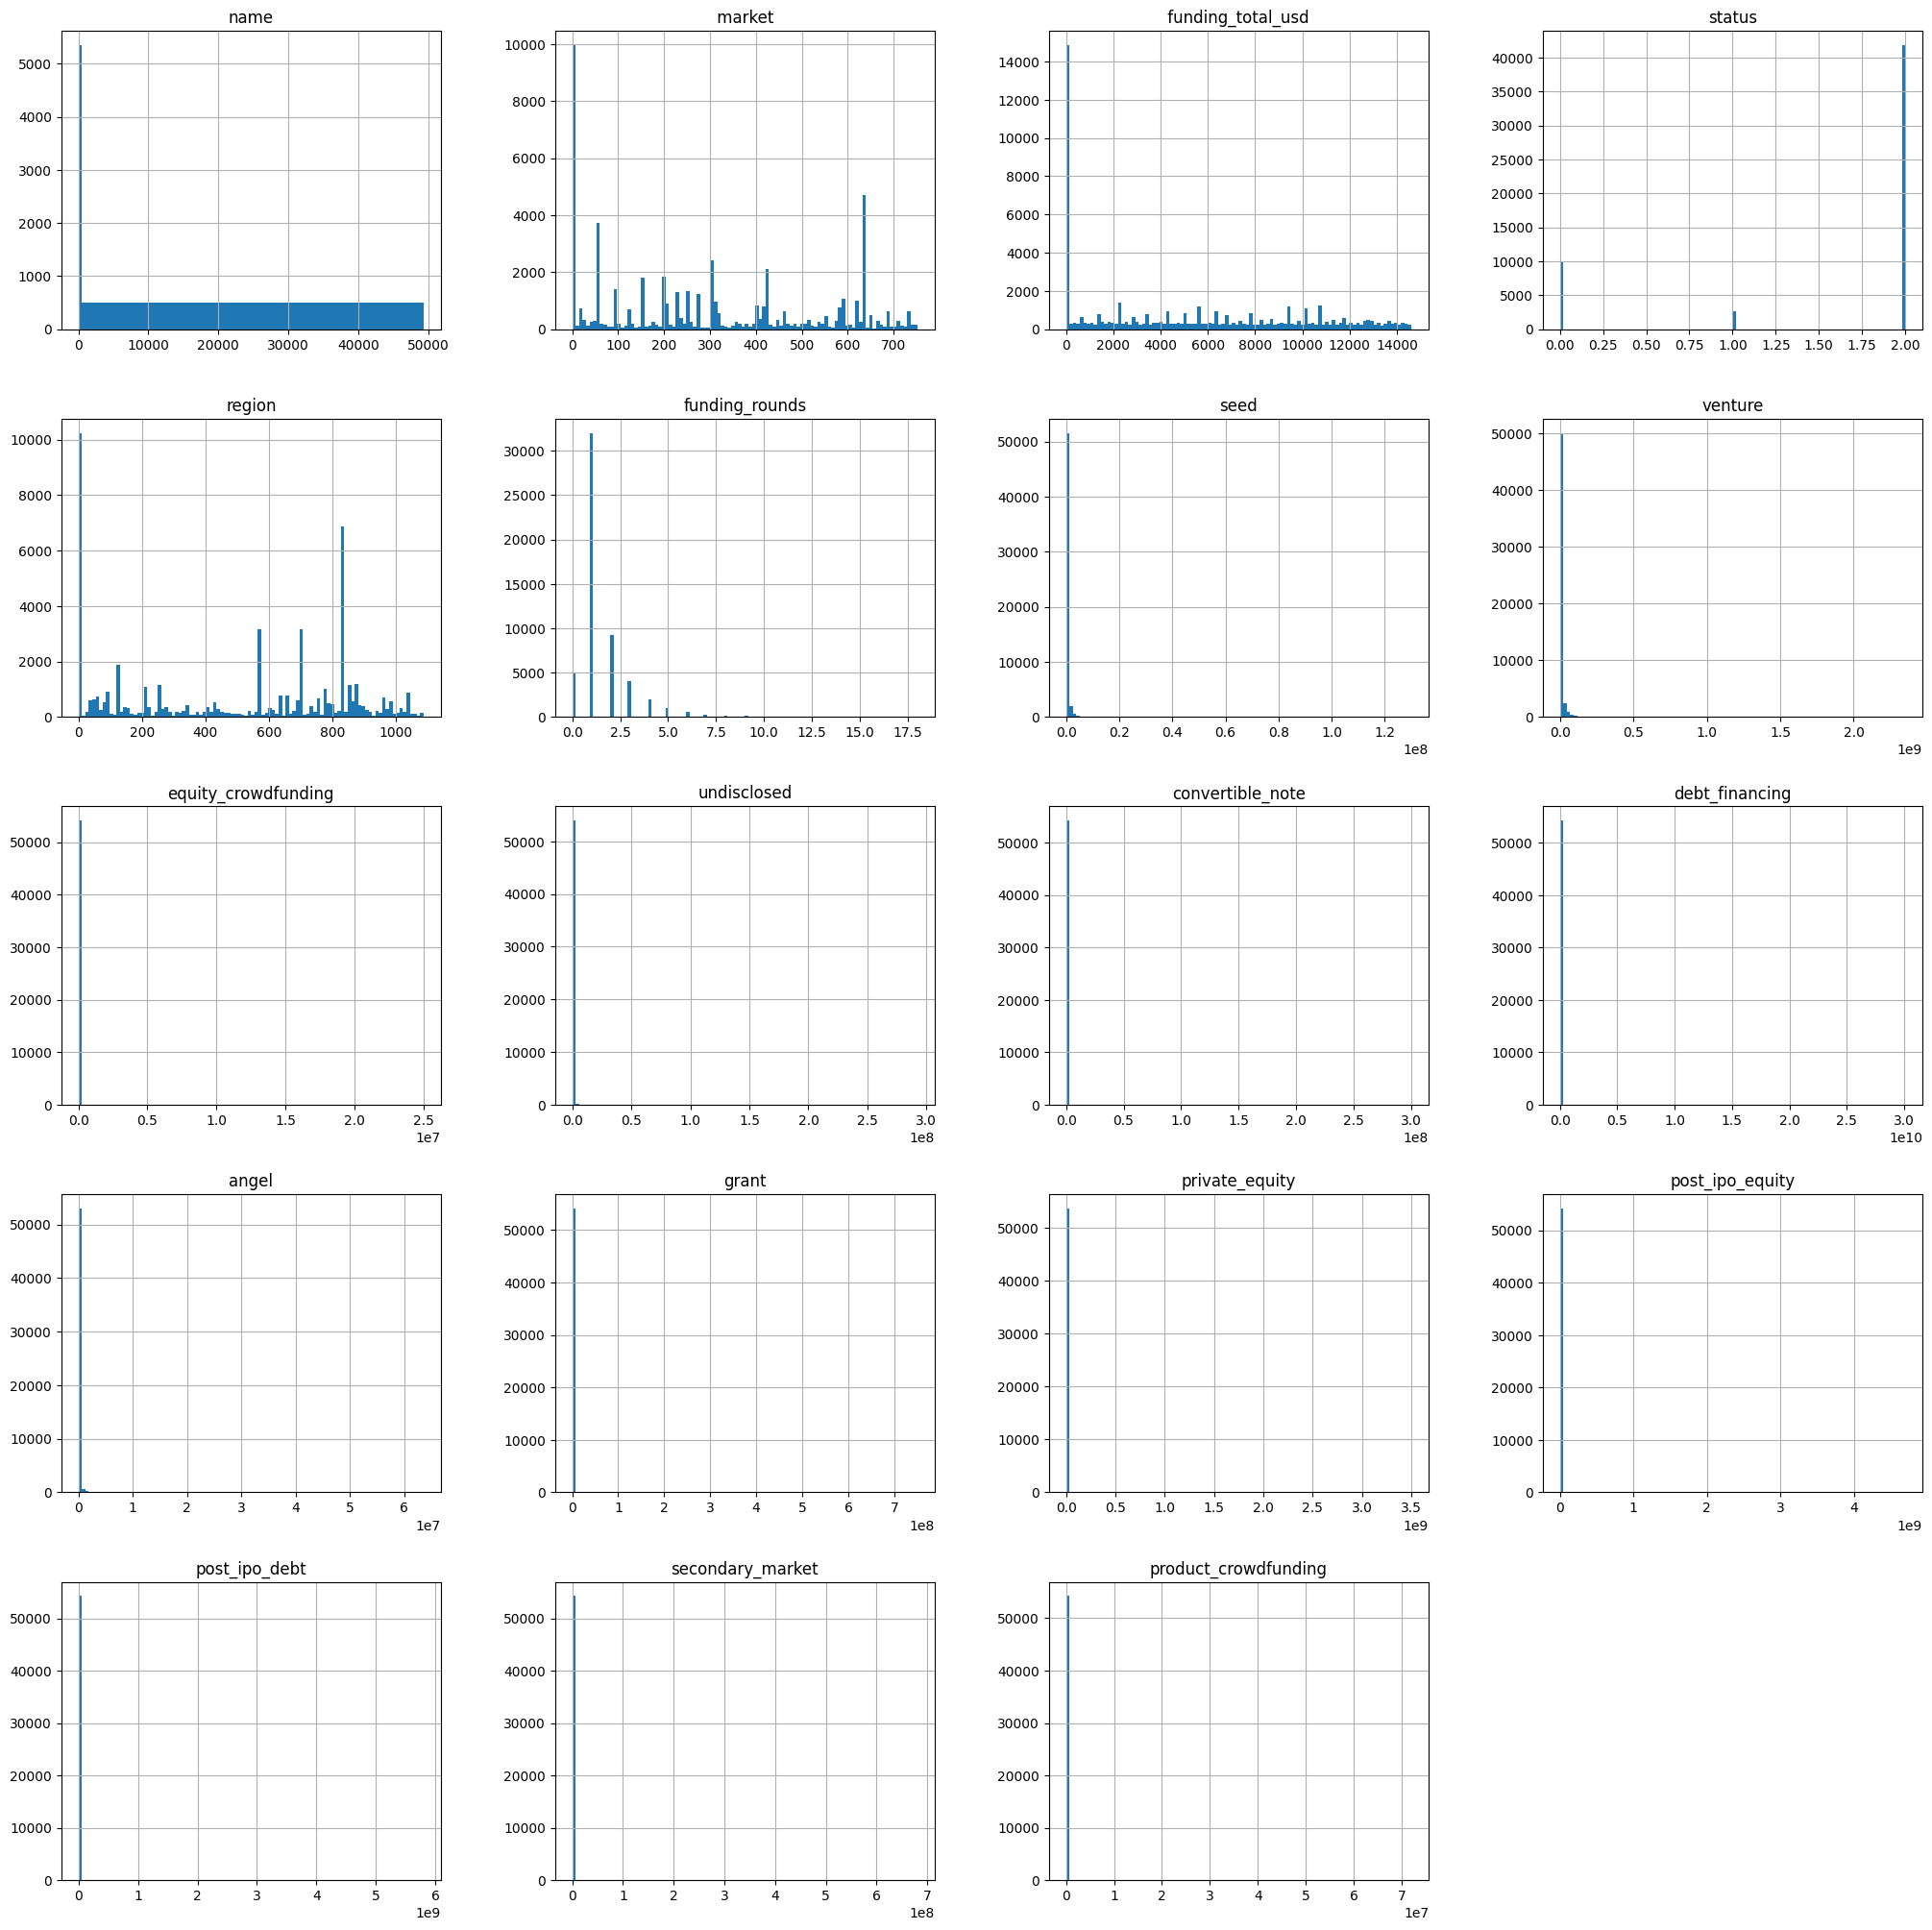

In [11]:
# =======================================================================================================
# Plotting Histograms to visualize the data distribution:
# =======================================================================================================

ax = df.hist(figsize=(25,25), bins=100)
plt.show()


# 3. Creating the first Classifier (Naive Bayes)

# 4. Creating the second Classifier (Decision Trees)

# 5. Creating the third Classifier (Random Forest)

# 6. Creating the fourth Classifier (ANN)